In [1]:
from mongodb.content_provider import ContentProvider
import geopandas as gpd
from shapely.geometry import mapping
import json

# Initialise a new ContentProvider object

In [2]:
contentProvider = ContentProvider("mongo_test", "geodata")

# Read and Insert Data using ContentProvider

In [3]:
contentProvider.delete_data()

data = gpd.read_file('search_ctx.geojson')
data = data.rename(columns={'id':'_id'})
data['geometry'] = data['geometry'].apply(lambda x:mapping(x))
contentProvider.insert_data(data)

data = gpd.read_file('search_hirise.geojson')
data = data.rename(columns={'id':'_id'})
data['geometry'] = data['geometry'].apply(lambda x:mapping(x))
contentProvider.insert_data(data)

/home/canyetismis/mongo_test/lib/python3.8/site-packages/geopandas-0.10.2-py3.8.egg/geopandas/geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
/home/canyetismis/mongo_test/lib/python3.8/site-packages/geopandas-0.10.2-py3.8.egg/geopandas/geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


# Query All Data

In [4]:
query = contentProvider.query_data()
query

,_id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,image_url,label_url,browse_url,geometry
0,P16_007361_1800_XN_00S000W,MRO,CTX,EDR,MARS,True,5.34,0.0198,0,359.82,...,43.91,34.81,2008-02-21T00:58:55.696999,2008-07-17T04:09:49,2008-02-21T00:58:48.971001,2008-02-21T00:59:02.424000,https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None,"{'type': 'Polygon', 'coordinates': [[[0.18, 0...."
1,PSP_007361_1800_RED,MRO,HIRISE,RDRV11,MARS,True,0.5,-0.0145,0.0069,359.989,...,43.953009,34.80857,2008-02-21T00:58:55.081001,2010-04-07T02:11:12,2008-02-21T00:58:50.834999,2008-02-21T00:58:59.327999,https://hirise.lpl.arizona.edu/PDS/RDR/PSP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/PSP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...,"{'type': 'Polygon', 'coordinates': [[[0.0797, ..."
2,ESP_023817_1800_RED,MRO,HIRISE,RDRV11,MARS,False,0.5,0.1009,359.9205,359.978,...,37.941905,350.748489,2011-08-26T08:15:15.659000,2011-09-01T02:08:15,2011-08-26T08:15:13.722000,2011-08-26T08:15:17.597000,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...,"{'type': 'Polygon', 'coordinates': [[[-0.022, ..."
3,ESP_041909_1800_RED,MRO,HIRISE,RDRV11,MARS,True,0.5,-0.0033,0.0006,359.97,...,57.559947,8.638808,2015-07-06T01:30:48.244999,2015-08-13T17:12:54,2015-07-06T01:30:45.488998,2015-07-06T01:30:51.001999,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...,"{'type': 'Polygon', 'coordinates': [[[0.0646, ..."


# Make Spacial Query

In [5]:
# Query CTX data only
query = {"_id": "P16_007361_1800_XN_00S000W"}
query = contentProvider.query_data(query)
query

,_id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,image_url,label_url,browse_url,geometry
0,P16_007361_1800_XN_00S000W,MRO,CTX,EDR,MARS,True,5.34,0.0198,0,359.82,...,43.91,34.81,2008-02-21T00:58:55.696999,2008-07-17T04:09:49,2008-02-21T00:58:48.971001,2008-02-21T00:59:02.424000,https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None,"{'type': 'Polygon', 'coordinates': [[[0.18, 0...."


# Convert Queries to JSON

AttributeError: 'Series' object has no attribute 'crs'

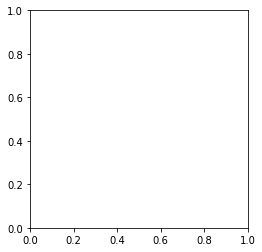

In [10]:
query = contentProvider.query_data()
query.plot()
#response = query.to_json()
#response = json.dumps(response, indent = 2)
#print(response)

# Terminate ContentProvider and Database Connection

In [9]:
#del contentProvider
!pip3 install matplotlib

     |████████████████████████████████| 11.3 MB 1.8 MB/s eta 0:00:01    |█████▎                          | 1.9 MB 2.4 MB/s eta 0:00:04     |██████████▏                     | 3.6 MB 2.4 MB/s eta 0:00:04     |█████████████████████████████▏  | 10.3 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 899 kB 12.4 MB/s eta 0:00:01     |█████████████████████████▉      | 727 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 12.2 MB/s eta 0:00:01     |███████████████████████████     | 3.7 MB 12.2 MB/s eta 0:00:01
